In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import sys
import os

In [2]:
import json

In [5]:
f = open('../Results/sampleN20.json')

# returns JSON object as 
# a dictionary
data = json.load(f)
# Print all keys in the JSON dictionary
for key in data.keys():
    print(key)

J
S
SS
SSS
SSS_obs
SS_obs
S_obs
h
n_bonds
n_spins
σ


In [6]:
S_ising = data['S']
S_exp = data['S_obs']

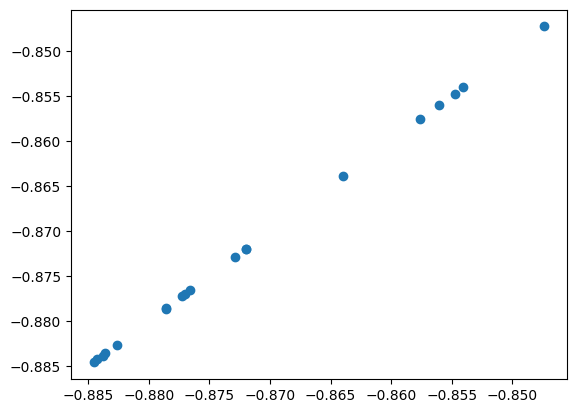

In [8]:
plt.plot(S_exp,S_ising,'o')
plt.show()

In [ ]:
parms = 'h'
exact_solution = True
N_spins = 20
save = False

# Create folder to test_erro
folder = f"./tests_erro/{parms}"
if not os.path.exists(folder):
    os.makedirs(folder)
f = open('../Results/sampleN20.json')

# returns JSON object as 
# a dictionary
data = json.load(f)

plt.figure(figsize=(16,9))
if parms=="J":
    y = df["erroJ"]
    if len(y)==1:
        print(f'erro_{parms} Atinge mínimo com um MCH para Nspins = {N_spins}')
    else:
        y_lim = np.ones(len(y))*9.1e-05

elif parms=="h":
    y = df["erroh"]
    if len(y)==1:
        print(f'erro_{parms} Atinge mínimo com um MCH para Nspins = {N_spins}')
    else:
        y_lim = np.ones(len(y))*4.2e-05

# Clear previous plot
#print(float(min_values['min_erro_j']))
plt.yscale("log")
plt.plot(x,y,'-',color='k')
plt.plot(x,y_lim,'--',color='red')
plt.xlabel("MCS",fontsize=22)
plt.ylabel(f"Erro {parms}",fontsize=22)
plt.xlim(min(x),max(x))
plt.title(f"Erro {parms} para Nspins = {N_spins}",fontsize=25)

if(save == True):
    j_min = 1.0
    h_min = 1.0
    
    plt.savefig(folder + f"/sampleN{N_spins}_parm_{parms}_j_{j_min}_h_{h_min}.pdf", dpi=300)
    
plt.show()